In [2]:
# IMPORT PACKAGES AND MODULES

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Read US_WeatherEvents_2016-2019.csv and trumptweets.csv files from directory

In [3]:
# Us_weather_data path 

weather_data_dir = "/Users/gaurikulkarni/Documents/Big Data/Assignmnet 1/"
us_weather_filename = "US_WeatherEvents_2016-2019.csv"

us_weather_data = pd.read_csv(weather_data_dir + us_weather_filename)

# Trum_tweet_data path

trum_tweet_dir = "/Users/gaurikulkarni/Documents/Big Data/Assignmnet 1/"
trum_tweet_filename = "trumptweets.csv"

trum_tweet_data = pd.read_csv(trum_tweet_dir + trum_tweet_filename)

### US WEATHER EVENT 2016- 2019 DATA

1.How many snow events were recorded?

Explanation: For snow event count, we have to fetch 'snow' record from column name 'Type' and store in dataframe. Then for counting recorded snow events, we can take a count of snow event datafarme column 'Type'.

In [4]:
#1. How many snow events were recorded?

weather_snow_data = us_weather_data[us_weather_data.Type == "Snow"]
snow_evet_count = weather_snow_data['Type'].count()
print('Total snow evet counts: ', snow_evet_count)

Total snow evet counts:  679472


2. How many moderate snow events were recorded each year? Produce table and plot line graph

Explanation: For moderate snow events count, fetch data column name as 'Severity = Moderate' from snow event dataframe and store record in new dataframe. Then for data count in new frame, we can apply condition using start time and end time to get different years and those years can be merge with start time to get 2016 - 2019 snow moderate event counts in those sepecific years. Table is produced using groupby method and line graph ploted using plot method.

In [5]:
#2. How many moderate snow events were recorded each year?

weather_severity_data = weather_snow_data[weather_snow_data.Severity == 'Moderate']

# snow moderate event count recorded by each year 2016-2019
weather_severity_data[['Severity']].count()

Severity    73641
dtype: int64

,Moderate Severity Year,Each Year Count
0,2016,16900
1,2017,15780
2,2018,18686
3,2019,22290


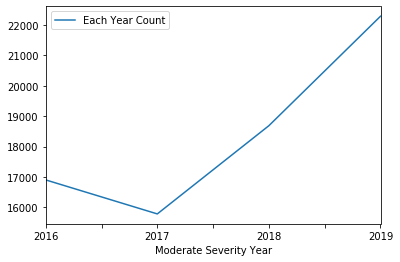

In [6]:
#2. How many moderate snow events were recorded each year? Produce table and plot line graph

weather_start_year = pd.DatetimeIndex(weather_severity_data['StartTime(UTC)']).year
weather_end_year = pd.DatetimeIndex(weather_severity_data['EndTime(UTC)']).year

# convert starttime and endtime to dataframe
weather_start_year = pd.DataFrame(weather_start_year).reset_index(drop=True)
weather_start_year.columns = ['Year']
 
weather_end_year = pd.DataFrame(weather_end_year).reset_index(drop=True)
weather_end_year.columns = ['Year']

# combine starttime and endtime where different year
combine_starttime_endtime = weather_end_year.where(weather_start_year['Year'] != weather_end_year['Year'])
combine_starttime_endtime = combine_starttime_endtime.dropna()

# merge combined data to starttime dataframe 
merge_different_years = pd.concat([weather_start_year,combine_starttime_endtime],axis=0)
merge_different_years = pd.DataFrame(merge_different_years).reset_index(drop=True)
merge_different_years.columns = ['Year']

# find out groupby('year') and count for each year
snow_modrate_each_year_count = merge_different_years.groupby('Year').size()
snow_modrate_each_year_count = pd.DataFrame(snow_modrate_each_year_count).reset_index()
snow_modrate_each_year_count.columns = ['Moderate Severity Year','Each Year Count']
snow_modrate_each_year_count = snow_modrate_each_year_count.astype(int)
snow_modrate_each_year_count['Moderate Severity Year'] = snow_modrate_each_year_count.astype(str)

# Line plot for snow moderate event for each year count
snow_modrate_each_year_count.plot.line(x='Moderate Severity Year',y='Each Year Count')

# Table for moderate snow evnt year and count
snow_modrate_each_year_count

3. How many snow events were recorded each state?

Explanation: For snow events recorded in each state, fetch data from snow event dataframe using groupby method on 'State' and use size() method for specific state counts and stored that data in new dataframe to show result

In [7]:
#3. How many snow events were recorded each state?

each_state_count = weather_snow_data.groupby('State').size()
snow_state_count = pd.DataFrame(each_state_count).reset_index()
snow_state_count.columns = ['State','Count of snow evets']
snow_state_count

,State,Count of snow evets
0,AL,701
1,AR,1461
2,AZ,4973
3,CA,8727
4,CO,38218
5,CT,3200
6,DE,663
7,FL,69
8,GA,1021
9,IA,26408


4. How many snow events were recorded each hour?

Explanation: For snow event recorded each hour, fetch start time and end time from snow event datafarme and take difference beweetn start and end time for how many hours that event lasted and stored event count for each hour.

In [8]:
#4. How many snow events were recorded each hour?

snow_start_hour = pd.to_datetime(weather_snow_data['StartTime(UTC)'])
snow_end_hour = pd.to_datetime(weather_snow_data['EndTime(UTC)'])
hour_diff = (snow_end_hour - snow_start_hour)
time_difference = hour_diff
hour_diff = hour_diff.dt.ceil('h').dt.total_seconds()
hour_diff = (hour_diff)/3600

#creating dataframe for snow each evets each hour records

each_hour_snow_evets = pd.DataFrame({'StartTime':weather_snow_data['StartTime(UTC)'],'EndTime':weather_snow_data['EndTime(UTC)'],'Hour Difference':time_difference,'Snow evet counts for each hour':hour_diff})
each_hour_snow_evets

,StartTime,EndTime,Hour Difference,Snow evet counts for each hour
0,2016-01-06 23:14:00,2016-01-07 00:34:00,01:20:00,2.0
1,2016-01-07 04:14:00,2016-01-07 04:54:00,00:40:00,1.0
2,2016-01-07 05:54:00,2016-01-07 15:34:00,09:40:00,10.0
3,2016-01-08 05:34:00,2016-01-08 05:54:00,00:20:00,1.0
4,2016-01-08 13:54:00,2016-01-08 15:54:00,02:00:00,2.0
...,...,...,...,...
5059821,2019-12-14 23:24:00,2019-12-14 23:53:00,00:29:00,1.0
5059822,2019-12-15 00:21:00,2019-12-15 02:53:00,02:32:00,3.0
5059826,2019-12-27 17:08:00,2019-12-27 17:43:00,00:35:00,1.0
5059831,2019-12-28 13:35:00,2019-12-28 17:04:00,03:29:00,4.0


5.How many events of each severity did San Diego have? Produce table and plot

Explanation: For each severity count in San diego, fetach data from us weather data as column name 'City = San Diego' and store that data in new dataframe. Table is produced using groupby method and bar graph ploted using plot.bar method.

,Severity,Count of severity SD
0,Heavy,62
1,Light,2870
2,Moderate,1992
3,Other,3
4,Severe,1365
5,UNK,15


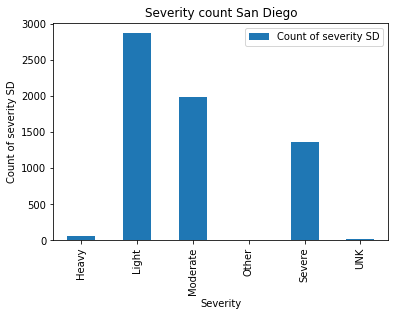

In [9]:
#5. How many events of each severity did San Diego have?

san_diego_data = us_weather_data[us_weather_data.City == 'San Diego']
servirity_all_sd = san_diego_data.groupby('Severity').size()
servirity_all_sd = pd.DataFrame(servirity_all_sd).reset_index()
servirity_all_sd.columns = ['Severity','Count of severity SD']

# Bar plot for severity count in san diego
servirity_all_sd_graph =  servirity_all_sd.plot.bar(x='Severity',y='Count of severity SD',title='Severity count San Diego')
servirity_all_sd_graph.set_ylabel("Count of severity SD")
# Table 
servirity_all_sd

### TRUM TWEET DATA

1. How many tweets did the President make each year? Produce a table of results and plot the values.

Explanation: For tweet counts each year, fetch data from trump tweet data column 'date' and used DateTimeIndex for extracting year from date column and store extracted year in new dataframe. To produce table groupby and size method is used and bar graph ploted using plot.bar method.

,Year,Tweet count
0,2009,56
1,2010,143
2,2011,870
3,2012,4190
4,2013,8207
5,2014,5987
6,2015,7719
7,2016,3951
8,2017,2232
9,2018,2998


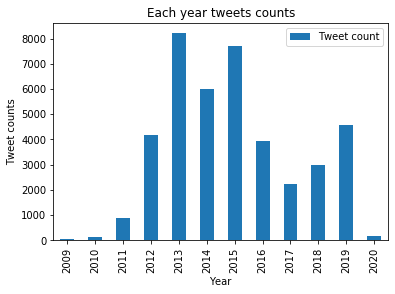

In [10]:
# TRUM TWEET DATA

#1. How many tweets did the President make each year? Produce a table of results and plot the values.

all_year_data = pd.DatetimeIndex(trum_tweet_data['date']).year
all_year_data = pd.DataFrame(all_year_data).reset_index()
tweet_year = all_year_data.groupby('date').size()
tweet_year = pd.DataFrame(tweet_year).reset_index()
tweet_year.columns = ['Year','Tweet count']

# Bar plot for tweets count each year
tweet_count_graph = tweet_year.plot.bar(x='Year',y='Tweet count',title='Each year tweets counts')
tweet_count_graph.set_ylabel("Tweet counts")
# Table 
tweet_year

2. How many tweets contain "Fake News"?

Explanation: For fake news in tweet counts, fetach data from trump tweet data column name 'content' used str.contains method to check if 'Fake News' string is in row, all rows which contains fake news will strore in new variable and for total fake news count use 'conunt' method.

In [72]:
#2. How many tweets contain "Fake News"?

fake_news_data = trum_tweet_data[trum_tweet_data['content'].str.contains('Fake News|FakeNews', case=False, na=False)]
# fake_news_data_new = trum_tweet_data[trum_tweet_data['content'].str.contains('FakeNews', regex=False, case=False, na=False)]

fake_news_count = fake_news_data.content.count()
# fake_news_data_new = fake_news_data_new.content.count()

print('Fake news tweet count: ',fake_news_count)

Fake news tweet count:  579


3. A tweet with the location could be considered a security issue as it would give the current location of the President. How many tweets contain a location?

Explanation: For tweet with geo location count, fetch data from trump tweet data column 'geo' store all location in variable and for geo location count use count method. There is second way to fetch ego location using notnull() method.

In [12]:
#3. A tweet with the location could be considered a security issue as it would give the current 
#location of the President. How many tweets contain a location?

geo_location = trum_tweet_data['geo']

#geo_location = trum_tweet_data[trum_tweet_data['geo'].notnull()]

print('Tweets contains geo location count: ', geo_location.count())

Tweets contains geo location count:  0


4. How many tweets were done each hour?Produce a table and plot.

Explanation: For tweet counts each hour, fetch data from trump tweet data column 'date' and used to_datetime for extracting hour from date column and store extracted hour in new dataframe. To produce table groupby and size method is used and bar graph ploted using plot.bar method.

,Hours,Tweet counts each hour
0,0,1620
1,1,1522
2,2,1795
3,3,1974
4,4,2076
5,5,1258
6,6,831
7,7,400
8,8,347
9,9,321


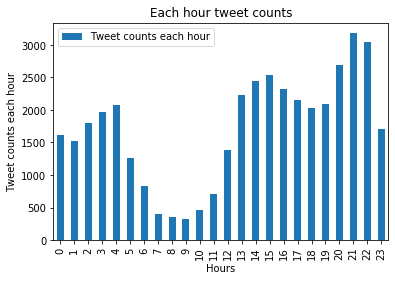

In [13]:
#4.How many tweets were done each hour?Produce a table and plot.

trump_hour_data = pd.to_datetime(trum_tweet_data['date']).dt.hour
trump_hour_data = pd.DataFrame(trump_hour_data).reset_index()
# groupby 'date' use size() for count
trump_hour_data = trump_hour_data.groupby('date').size()
tweet_count_each_hour = pd.DataFrame(trump_hour_data).reset_index()
tweet_count_each_hour.columns = ['Hours','Tweet counts each hour']
tweet_count_each_hour = tweet_count_each_hour.reset_index(drop=True)

# Bar graph for each hour tweet count
tweet_count_hour_graph = tweet_count_each_hour.plot.bar(x='Hours', y='Tweet counts each hour',title='Each hour tweet counts')
tweet_count_hour_graph.set_ylabel("Tweet counts each hour")
# Table for hour and each hour count
tweet_count_each_hour
